<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


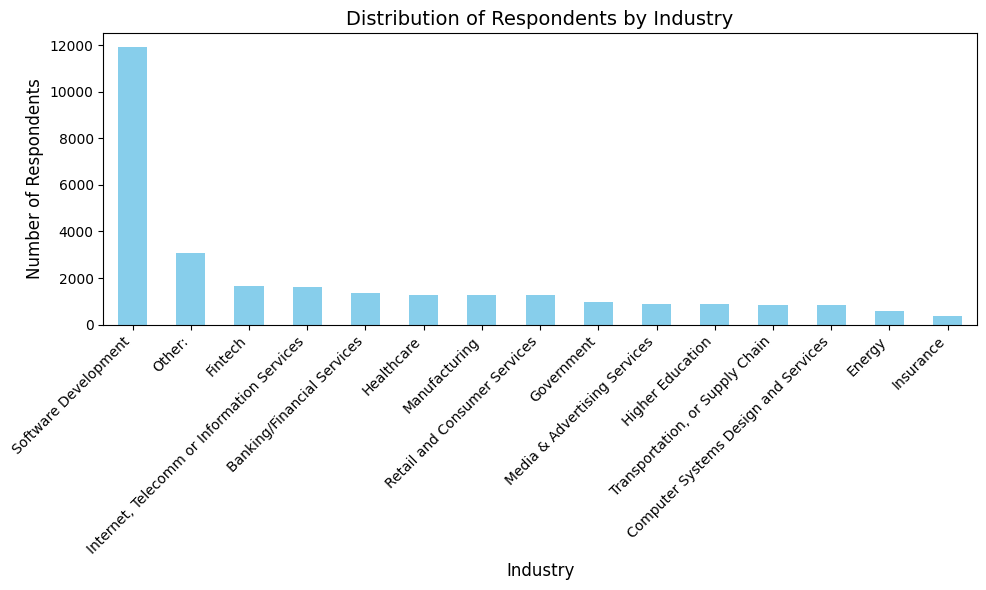

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check for missing values in the 'Industry' column (if any)
industry_counts = df['Industry'].value_counts()

# Step 2: Plot a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Step 3: Add labels and title to the chart
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Step 4: Show the plot
plt.show()

# Optionally, print the industry distribution to identify trends
print(industry_counts)


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
# Step 1: Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_dev_comp = df['ConvertedCompYearly'].std()

# Step 2: Identify respondents with compensation exceeding 3 standard deviations above the mean
threshold = mean_comp + 3 * std_dev_comp
high_comp_respondents = df[df['ConvertedCompYearly'] > threshold]

# Displaying the basic statistics
print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation of Compensation: {std_dev_comp:.2f}")

# Step 3: Display respondents with compensation above the threshold
print(f"\nRespondents with compensation greater than {threshold:.2f}:")
print(high_comp_respondents[['ConvertedCompYearly']])

# Optional: Display the number of such respondents
print(f"\nNumber of respondents with high compensation: {high_comp_respondents.shape[0]}")


Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation of Compensation: 186756.97

Respondents with compensation greater than 646426.21:
       ConvertedCompYearly
529               650000.0
828              1000000.0
1932              945000.0
2171              750000.0
2187             2000000.0
...                    ...
38219            1000000.0
39643            1300000.0
40066             800000.0
40952             750000.0
41027             700000.0

[89 rows x 1 columns]

Number of respondents with high compensation: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


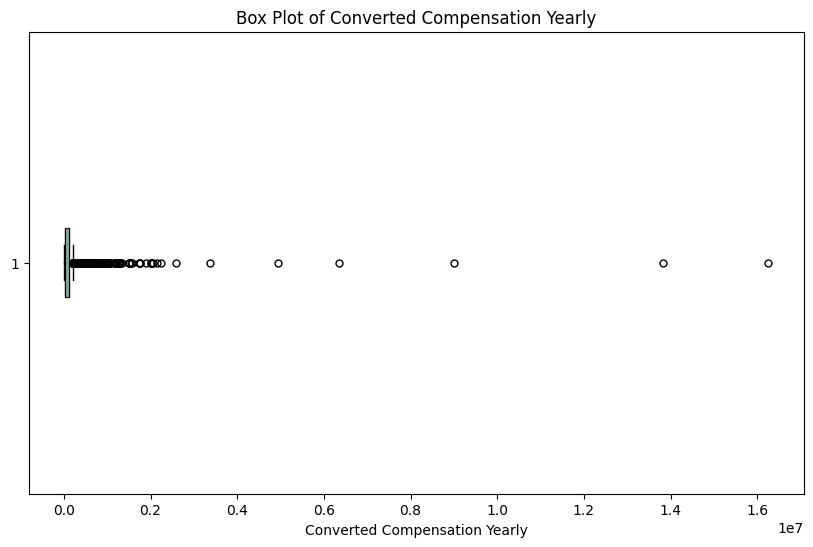

In [9]:
# Drop NaN and infinite values from the column
import numpy as np
cleaned_comp = df['ConvertedCompYearly'].dropna()
cleaned_comp = cleaned_comp[cleaned_comp.apply(lambda x: np.isfinite(x))]

# Now plot again
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_comp, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Box Plot of Converted Compensation Yearly')
plt.xlabel('Converted Compensation Yearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [10]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the size of the new DataFrame
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Original dataset size: 65437
Dataset size after removing outliers: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [11]:
df['Age'].head()

0    Under 18 years old
1       35-44 years old
2       45-54 years old
3       18-24 years old
4       18-24 years old
Name: Age, dtype: object

In [12]:
# Define the mapping
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Map Age column to numeric values
df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].map(age_mapping)


/tmp/ipykernel_854/537919894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].map(age_mapping)


In [13]:
# Select numeric columns (including AgeNumeric)
numeric_df = df_no_outliers.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Show correlations with AgeNumeric
age_corr = corr_matrix['AgeNumeric'].sort_values(ascending=False)
print(age_corr)


AgeNumeric             1.000000
WorkExp                0.844999
ConvertedCompYearly    0.369810
JobSat                 0.067124
CompTotal             -0.021359
JobSatPoints_1        -0.038959
ResponseId            -0.040561
JobSatPoints_6        -0.051346
JobSatPoints_8        -0.051488
JobSatPoints_4        -0.070039
JobSatPoints_7        -0.083416
JobSatPoints_9        -0.083847
JobSatPoints_5        -0.096770
JobSatPoints_11       -0.106611
JobSatPoints_10       -0.111667
Name: AgeNumeric, dtype: float64


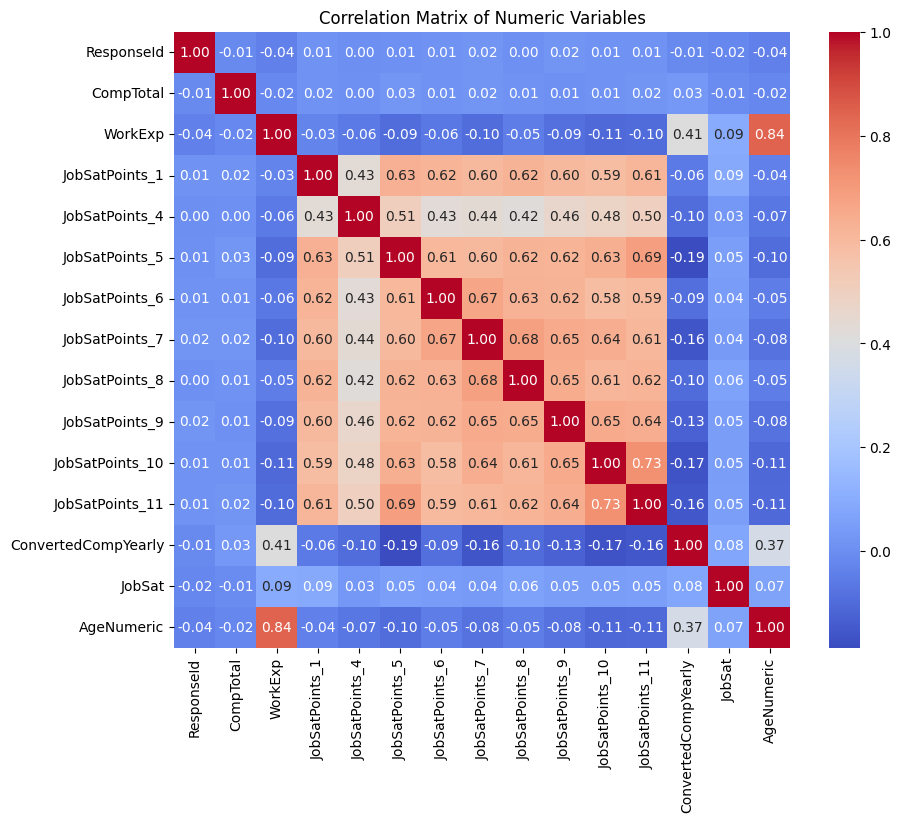

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
